# **Malaria Cell Detection**

> 🎃 Malaria Cell Detection uses a Deep Transfer Learning CNN to classify images into two categories ```Malaria Infected Cell``` and ```Healthy Cell```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

## Loading Data

* Use Kaggle API command to download the dataset as a Zip file
* Unzip the Zip file containing data, using ```ZipFile```
* Use ```tf.keras.utils.image_dataset_from_directory()```

In [2]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 675M/675M [00:32<00:00, 22.7MB/s]
100% 675M/675M [00:32<00:00, 21.7MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cell-images-for-detecting-malaria.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
!rm -r /content/cell_images/cell_images # deleting the not necessary folder from data

In [7]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [8]:
# Load image using tf.keras.utils.image_dataset_from_directory
data = tf.keras.utils.image_dataset_from_directory(
    '/content/cell_images',
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)

Found 27558 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [10]:
batch[0][0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [11]:
batch[0][0].shape

(224, 224, 3)

In [12]:
tf.reduce_min(batch[0][0]), tf.reduce_max(batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=201.90373>)

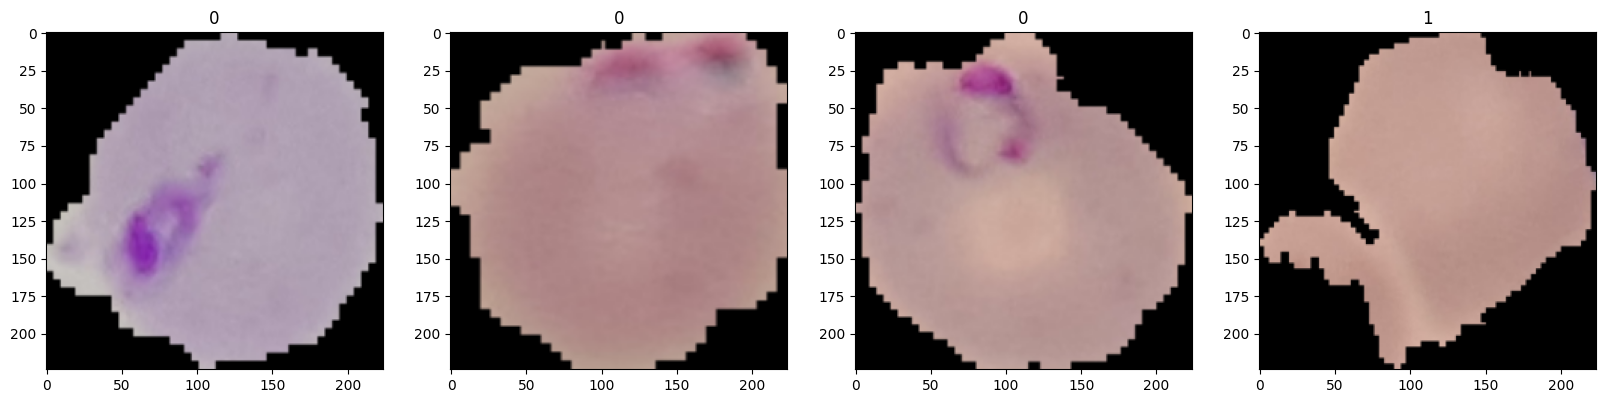

In [13]:
# Visualizing Data
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for indx, image in enumerate(batch[0][:4]):
  ax[indx].imshow(image.astype('int'))
  ax[indx].title.set_text(batch[1][indx])

## Preprocessing Data

In [14]:
data = data.map(lambda x,y: (x/255, y))
scaled_data_iterator = data.as_numpy_iterator()
scaled_batch = scaled_data_iterator.next()

In [15]:
scaled_batch[0][0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [16]:
scaled_batch[1]

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int32)

In [17]:
tf.reduce_min(scaled_batch[0][0]), tf.reduce_max(scaled_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.8916169>)

## Partioning Data
> We have to split the data into training and testing batches

In [18]:
len(data)

862

In [19]:
train_data_size = int(len(data)*0.8)
test_data_size = int(len(data)*0.2) + 1
train_data_size, test_data_size

(689, 173)

In [20]:
train_data = data.take(train_data_size)
test_data = data.skip(train_data_size).take(test_data_size)

In [21]:
train_data

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
len(train_data)

689

## Setting up Callbacks

In [23]:
def model_checkpoint_callback(checkpoint_file_path):
# Creating a Model CheckPoint callback to save the model's weigth only per epoch
  callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_file_path,
                                                monitor='val_accuracy',
                                                save_weights_only=True,
                                                save_best_only=True,
                                                save_freq='epoch', # save per epoch
                                                verbose=1)
  return callback

In [24]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Model Building

> We start with an relatively easy ```base custom CNN model```, and then slowly improve, we  will also use ```Transfer Learning```

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

### Inception V3 model

In [26]:
from tensorflow.keras.applications import InceptionV3
inceptionv3_convbase = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in inceptionv3_convbase.layers:
  layer.trainable = False # Freezing all the layers

87910968/87910968 [==============================] - 5s 0us/step


In [30]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
x = inceptionv3_convbase(input_layer, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

inceptionv3_model = Model(input_layer, output)

In [31]:
inceptionv3_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [32]:
inceptionv3_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               13107456  
                                                                 
 batch_normalization_96 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                           

In [33]:
history_inceptionv3 = inceptionv3_model.fit(
    train_data,
    epochs=15,
    batch_size=32,
    validation_data=test_data,
    callbacks=[create_tensorboard_callback(dir_name='Malaria_Cell_Images_Detection',
                                           experiment_name='InceptionV3')]
)

Saving TensorBoard log files to: Malaria_Cell_Images_Detection/InceptionV3/20230812-084353
Epoch 1/15
689/689 [==============================] - 106s 131ms/step - loss: 0.2296 - accuracy: 0.9120 - val_loss: 0.1641 - val_accuracy: 0.9387
Epoch 2/15
689/689 [==============================] - 94s 136ms/step - loss: 0.1655 - accuracy: 0.9368 - val_loss: 0.1646 - val_accuracy: 0.9387
Epoch 3/15
689/689 [==============================] - 87s 126ms/step - loss: 0.1437 - accuracy: 0.9470 - val_loss: 0.1462 - val_accuracy: 0.9461
Epoch 4/15
689/689 [==============================] - 90s 131ms/step - loss: 0.1290 - accuracy: 0.9521 - val_loss: 0.1585 - val_accuracy: 0.9454
Epoch 5/15
689/689 [==============================] - 89s 129ms/step - loss: 0.1153 - accuracy: 0.9556 - val_loss: 0.2171 - val_accuracy: 0.9211
Epoch 6/15
689/689 [==============================] - 91s 132ms/step - loss: 0.1014 - accuracy: 0.9631 - val_loss: 0.1944 - val_accuracy: 0.9377
Epoch 7/15
689/689 [==================

### Inception ResNet V2 model

In [34]:
from tensorflow.keras.applications import InceptionResNetV2
inception_resnet_convbase = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in inception_resnet_convbase.layers:
  layer.trainable = False # Freezing all the layers

219055592/219055592 [==============================] - 11s 0us/step


In [35]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
x = inception_resnet_convbase(input_layer, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

inception_resnet_model = Model(input_layer, output)

In [36]:
inception_resnet_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [37]:
inception_resnet_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_2 (Flatten)         (None, 38400)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               9830656   
                                                                 
 batch_normalization_301 (Ba  (None, 256)              1024      
 tchNormalization)                                               
                                                                 
 dropout_4 (Dropout)         (None, 256)               0   

In [38]:
history_inception_resnet = inception_resnet_model.fit(
    train_data,
    epochs=15,
    batch_size=32,
    validation_data=test_data,
    callbacks=[create_tensorboard_callback(dir_name='Malaria_Cell_Images_Detection',
                                           experiment_name='InceptionResNetV2')]
)

Saving TensorBoard log files to: Malaria_Cell_Images_Detection/InceptionResNetV2/20230812-091545
Epoch 1/15
689/689 [==============================] - 202s 262ms/step - loss: 0.2187 - accuracy: 0.9180 - val_loss: 0.1486 - val_accuracy: 0.9485
Epoch 2/15
689/689 [==============================] - 175s 253ms/step - loss: 0.1585 - accuracy: 0.9421 - val_loss: 0.1475 - val_accuracy: 0.9505
Epoch 3/15
689/689 [==============================] - 174s 253ms/step - loss: 0.1402 - accuracy: 0.9484 - val_loss: 0.1588 - val_accuracy: 0.9465
Epoch 4/15
689/689 [==============================] - 175s 254ms/step - loss: 0.1291 - accuracy: 0.9521 - val_loss: 0.1457 - val_accuracy: 0.9505
Epoch 5/15
689/689 [==============================] - 179s 259ms/step - loss: 0.1106 - accuracy: 0.9603 - val_loss: 0.1578 - val_accuracy: 0.9477
Epoch 6/15
689/689 [==============================] - 175s 254ms/step - loss: 0.1076 - accuracy: 0.9600 - val_loss: 0.1647 - val_accuracy: 0.9514
Epoch 7/15
689/689 [=======

### ResNet152 V2

In [39]:
from tensorflow.keras.applications import ResNet152V2
resnet152v2_convbase = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in resnet152v2_convbase.layers:
  layer.trainable = False # Freezing all the layers

234545216/234545216 [==============================] - 11s 0us/step


In [40]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
x = resnet152v2_convbase(input_layer, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
output = Dense(1, activation='sigmoid')(x)

resnet152v2_model = Model(input_layer, output)

In [41]:
resnet152v2_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [42]:
resnet152v2_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_9 (Dense)             (None, 256)               25690368  
                                                                 
 batch_normalization_303 (Ba  (None, 256)              1024      
 tchNormalization)                                               
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                           

In [43]:
history_resnet152 = resnet152v2_model.fit(
    train_data,
    epochs=10,
    batch_size=32,
    validation_data=test_data,
    callbacks=[create_tensorboard_callback(dir_name='Malaria_Cell_Images_Detection',
                                           experiment_name='ResNet152V2'),
               model_checkpoint_callback('Malaria-Cell-Images-Detection/ResNet152V2/checkpoint.ckpt')]
)

Saving TensorBoard log files to: Malaria_Cell_Images_Detection/ResNet152V2/20230812-100308
Epoch 1/10
689/689 [==============================] - ETA: 0s - loss: 0.2067 - accuracy: 0.9227
Epoch 1: val_accuracy improved from -inf to 0.94592, saving model to Malaria-Cell-Images-Detection/ResNet152V2/checkpoint.ckpt
689/689 [==============================] - 247s 337ms/step - loss: 0.2067 - accuracy: 0.9227 - val_loss: 0.1504 - val_accuracy: 0.9459
Epoch 2/10
689/689 [==============================] - ETA: 0s - loss: 0.1275 - accuracy: 0.9537
Epoch 2: val_accuracy improved from 0.94592 to 0.95172, saving model to Malaria-Cell-Images-Detection/ResNet152V2/checkpoint.ckpt
689/689 [==============================] - 247s 358ms/step - loss: 0.1275 - accuracy: 0.9537 - val_loss: 0.1446 - val_accuracy: 0.9517
Epoch 3/10
689/689 [==============================] - ETA: 0s - loss: 0.1026 - accuracy: 0.9636
Epoch 3: val_accuracy did not improve from 0.95172
689/689 [==============================] - 

## Model Evaluating
**🤔 Why is Model Evaluating Important**
* Its important to evaluate our model to see its **performence on the test data**
* It also helps in **choosing the best model** among the models that you have built

In [44]:
# Inception V3 results
results_inceptionv3 = inceptionv3_model.evaluate(test_data)
results_inceptionv3

173/173 [==============================] - 34s 69ms/step - loss: 0.2223 - accuracy: 0.9426


[0.22226360440254211, 0.9426497220993042]

<Axes: >

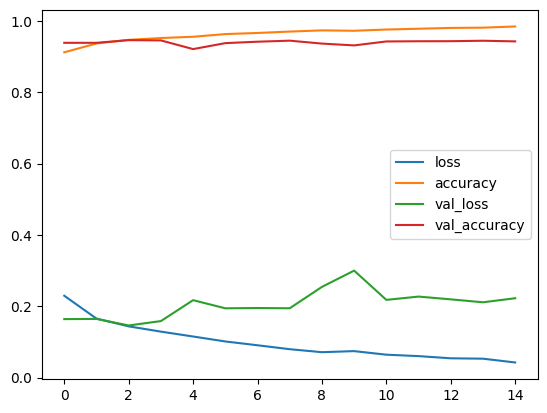

In [45]:
pd.DataFrame(history_inceptionv3.history).plot()

In [47]:
# Inception ResNet V2
results_inception_resnet = inception_resnet_model.evaluate(test_data)
results_inception_resnet

173/173 [==============================] - 50s 167ms/step - loss: 0.1978 - accuracy: 0.9535


[0.1977749466896057, 0.9535390138626099]

<Axes: >

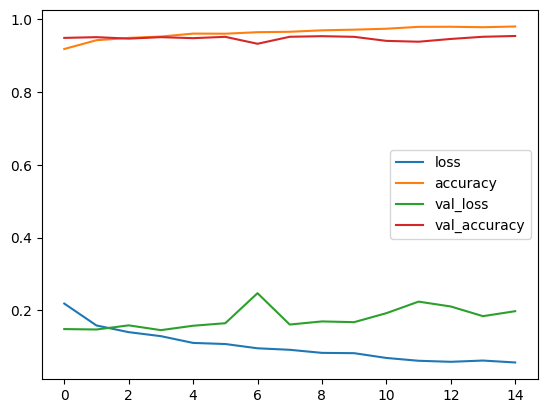

In [48]:
pd.DataFrame(history_inception_resnet.history).plot()

In [49]:
# Inception ResNet V2
results_resnet152v2 = resnet152v2_model.evaluate(test_data)
results_resnet152v2

173/173 [==============================] - 61s 218ms/step - loss: 0.2299 - accuracy: 0.9544


[0.22991561889648438, 0.9544464349746704]

<Axes: >

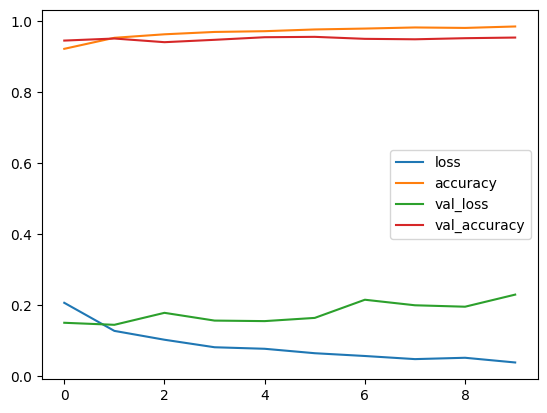

In [50]:
pd.DataFrame(history_resnet152.history).plot()

## Viewing our results with TensorBoard

In [51]:
# Upload experiment results to TensorBoard (uncomment to run)
!tensorboard dev upload --logdir ./Malaria_Cell_Images_Detection\
  --name "Malaria Cell Image Detection" \
  --description "Deep CNN Transfer Learning model for classifying into Infected or Healthy Cell" \
  --one_shot

2023-08-12 10:50:41.202069: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./Malaria_Cell_Images_Detection

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   ZQB-GZF-RHZ



New experiment created. View your TensorBoard at: https://tens

## Setting up a function to make predictions on custom images

In [55]:
class_names = ['Malaria Infected Cell', 'Healthy Cell']
def single_predictions(img_path, img_size=224):
  img = tf.io.read_file(img_path)
  decoded_img = tf.io.decode_image(img)
  resized_img = tf.image.resize(decoded_img, [img_size, img_size])
  input_tensor = tf.cast(resized_img/255. , dtype=tf.float32)
  y_pred1 = inception_resnet_model.predict(tf.expand_dims(input_tensor, axis=0))
  if tf.round(y_pred1) == 1:
    y_prob1 = y_pred1
  else:
    y_prob1 = 1.0 - y_pred1[0][0]

  plt.subplot(1, 2, 1)
  plt.imshow(input_tensor)
  plt.title(f'Inception ResNet V2 \n {class_names[int(tf.round(tf.squeeze(y_pred1)))]} \n Probability : {y_prob1}')

  y_pred2 = resnet152v2_model.predict(tf.expand_dims(input_tensor, axis=0))
  if tf.round(y_pred2) == 1:
    y_prob2 = y_pred2
  else:
    y_prob2 = 1.0 - y_pred2[0][0]

  plt.subplot(1, 2, 2)
  plt.imshow(input_tensor)
  plt.title(f'ResNet152V2 Model \n {class_names[int(tf.round(tf.squeeze(y_pred2)))]} \n Probability : {y_prob2}')

1/1 [==============================] - 0s 103ms/step


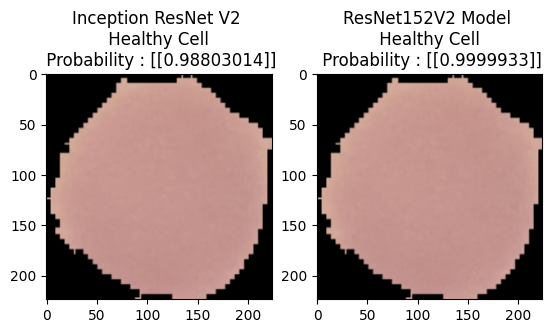

In [56]:
single_predictions('/content/C143P104ThinF_IMG_20151005_225746_cell_127.png')

1/1 [==============================] - 0s 32ms/step


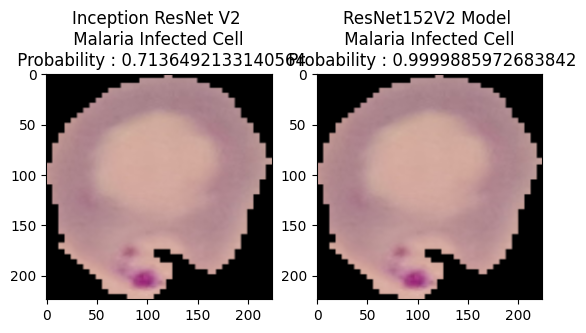

In [60]:
single_predictions('/content/C39P4thinF_original_IMG_20150622_105102_cell_94.png')

1/1 [==============================] - 0s 106ms/step


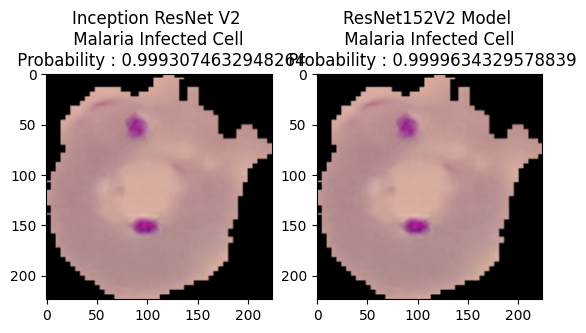

In [61]:
single_predictions('/content/C39P4thinF_original_IMG_20150622_105102_cell_95.png')

1/1 [==============================] - 0s 102ms/step


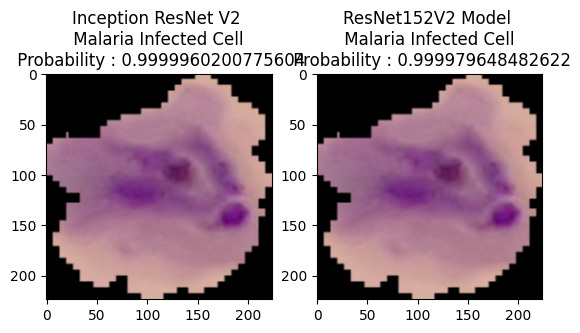

In [62]:
single_predictions('/content/C39P4thinF_original_IMG_20150622_105102_cell_96.png')

1/1 [==============================] - 0s 32ms/step


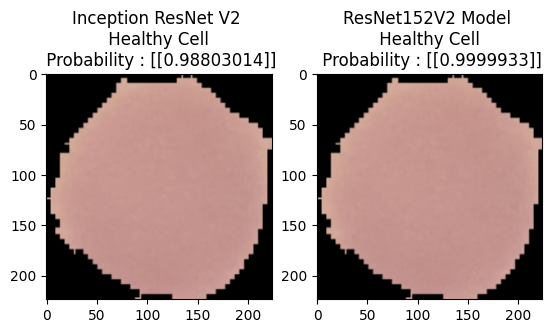

In [63]:
single_predictions('/content/C143P104ThinF_IMG_20151005_225746_cell_127.png')

1/1 [==============================] - 0s 90ms/step


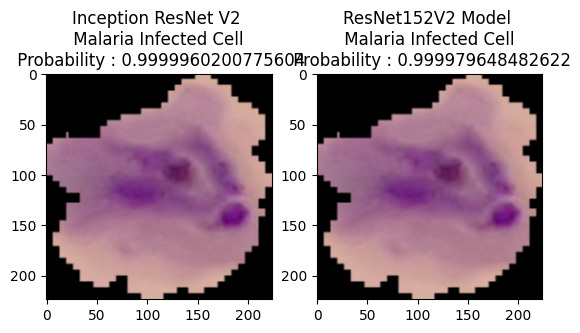

In [64]:
single_predictions('/content/C39P4thinF_original_IMG_20150622_105102_cell_96.png')

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Saving our Model

In [58]:
resnet152v2_model.save('/content/drive/MyDrive/resnet152_model.h5')

In [59]:
inception_resnet_model.save('/content/drive/MyDrive/inception_resnet_model.h5')